### Pair Programming I: EDA

**Objetivos**
- Buscar un conjunto de datos a analizar
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.


El conjunto elegido es [Airlines Customer Satisfaction](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction)

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado
- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
- Interpretación de los resultados.

In [34]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)


In [35]:
df = pd.read_csv('data/invistico_Airline.csv')
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0


Vamos a unificar los títulos de las columnas:

In [36]:
df.columns = [col.lower().replace(" ", "_").replace("/", "_").replace("-", "") for col in df.columns]
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


In [37]:
df.shape

(129880, 23)

Vamos a hacer un sample para poder trabajar bien con esta información:

In [38]:
df = df.sample(n=50000, random_state=5).reset_index(drop=True)

In [39]:
df.shape

(50000, 23)

In [40]:
df.dtypes

satisfaction                          object
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
seat_comfort                           int64
departure_arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_de

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,50000.0,39.361180,15.139810,7.0,27.0,40.0,51.0,85.0
flight_distance,50000.0,1981.559440,1026.029605,50.0,1364.0,1921.0,2543.0,6951.0
seat_comfort,50000.0,2.837760,1.392967,0.0,2.0,3.0,4.0,5.0
departure_arrival_time_convenient,50000.0,2.992320,1.527805,0.0,2.0,3.0,4.0,5.0
food_and_drink,50000.0,2.849600,1.443309,0.0,2.0,3.0,4.0,5.0
gate_location,50000.0,2.986920,1.305306,0.0,2.0,3.0,4.0,5.0
inflight_wifi_service,50000.0,3.246200,1.319371,0.0,2.0,3.0,4.0,5.0
inflight_entertainment,50000.0,3.376200,1.350863,0.0,2.0,4.0,4.0,5.0
online_support,50000.0,3.515280,1.309305,0.0,3.0,4.0,5.0,5.0
ease_of_online_booking,50000.0,3.468520,1.308390,0.0,2.0,4.0,5.0,5.0


In [42]:
df.describe(include="O").T

,count,unique,top,freq
satisfaction,50000,2,satisfied,27333
gender,50000,2,Female,25461
customer_type,50000,2,Loyal Customer,40880
type_of_travel,50000,2,Business travel,34472
class,50000,3,Business,23938


In [43]:
df.duplicated().sum()

0

In [44]:
df.isnull().sum()

satisfaction                           0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure_arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             138
dtype: int64

In [45]:
#Vamos a ver cuál es el porcentaje de nulos:
138/50000

0.00276

Como el número de nulos está por debajo del 5%, reemplazamos por mediana:

In [46]:
df["arrival_delay_in_minutes"].fillna(df["arrival_delay_in_minutes"].median(), inplace= True)

In [47]:
df.isnull().sum().sum()

0

In [48]:
# Vamos a recategorizar las falsas numéricas:
cols_modificar = df.columns[7:-2]

for col in cols_modificar:
    df[col] = df[col].astype("category")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   satisfaction                       50000 non-null  object  
 1   gender                             50000 non-null  object  
 2   customer_type                      50000 non-null  object  
 3   age                                50000 non-null  int64   
 4   type_of_travel                     50000 non-null  object  
 5   class                              50000 non-null  object  
 6   flight_distance                    50000 non-null  int64   
 7   seat_comfort                       50000 non-null  category
 8   departure_arrival_time_convenient  50000 non-null  category
 9   food_and_drink                     50000 non-null  category
 10  gate_location                      50000 non-null  category
 11  inflight_wifi_service              50000 

Vamos a hacer ahora el análisis exploratorio visual:

In [50]:
# Vamos a ver distribución de las variables categóricas:

lista_variables = df.select_dtypes(include=["O", "category"]).columns
    
def similar_variables(lista_variables, plot=True):
    """
    Esta función toma una lista de nombres de columnas 'lista_variables' de un DataFrame 'df' y 
    genera visualizaciones de gráficos de pastel para mostrar la distribución de valores únicos
    en cada columna de la lista.

    Parámetros:
    - lista_variables: Una lista de nombres de columnas que se desean analizar.
    - plot: Un valor booleano que determina si se deben generar gráficos de pastel (por defecto True).

    Salida:
    - Si 'plot' es True, se mostrarán gráficos de pastel para cada columna en la lista.
    - Si 'plot' es False, no se generarán gráficos de pastel.

    Ejemplo de uso:
    similar_variables(['columna1', 'columna2'], plot=True)
    """
    for columna in lista_variables:
        # Calcula el recuento de valores únicos en la columna
        value_counts = df[columna].value_counts()
        
        if plot == True:
            # Si 'plot' es True, genera un gráfico de pastel
            plt.figure()
            value_counts.plot.pie(figsize=(8, 8), autopct='%1.1f%%')
            plt.title(f'Los valores únicos para la variable {columna} son:')
        else:
            # Si 'plot' es False, no genera gráfico y pasa al siguiente
            pass

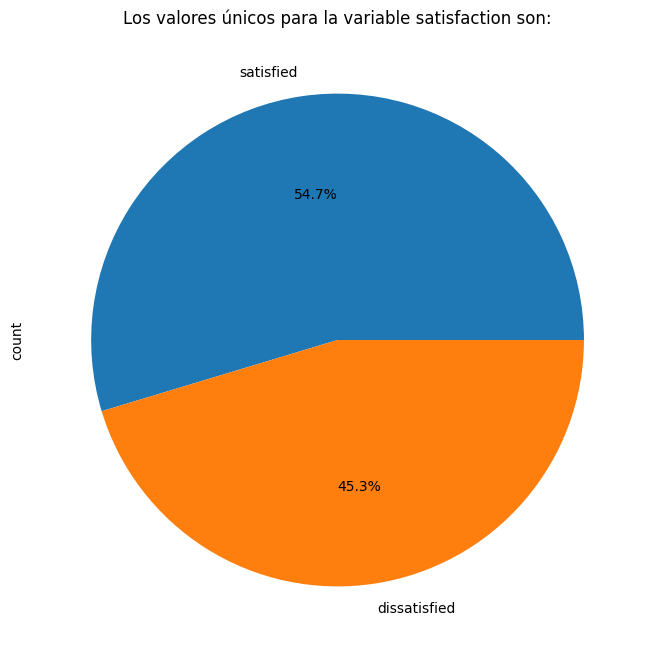

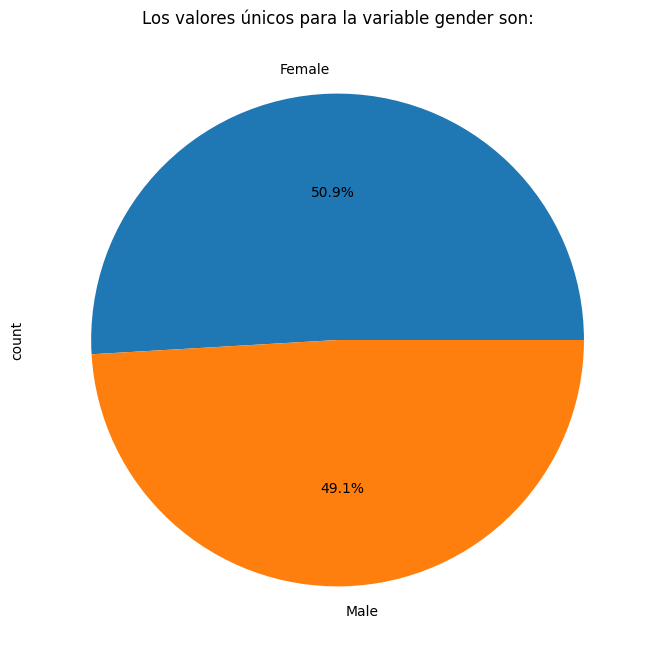

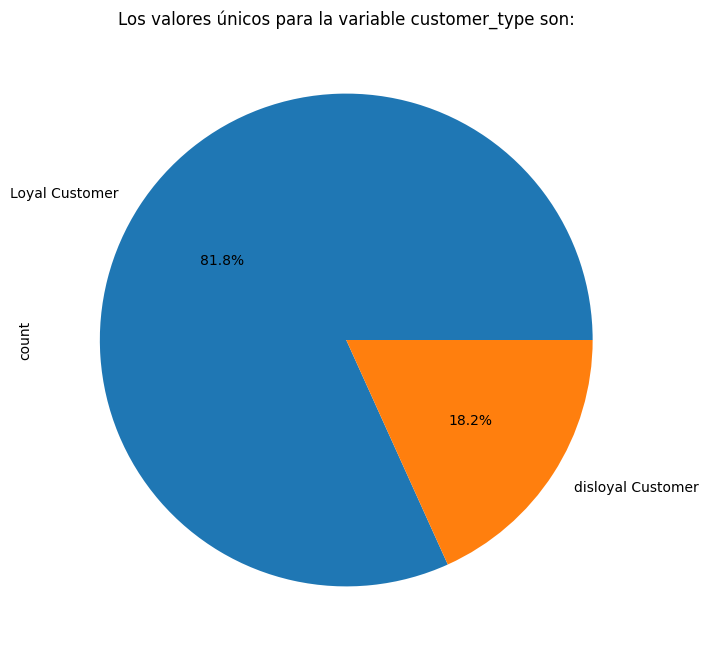

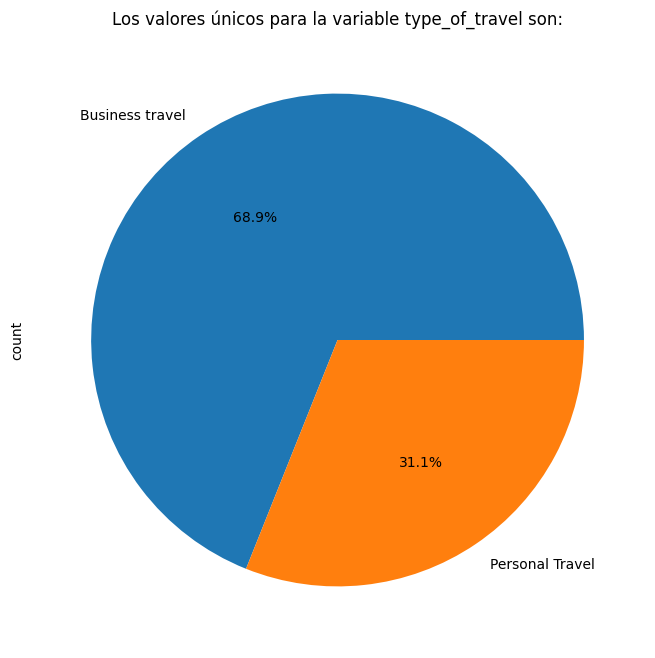

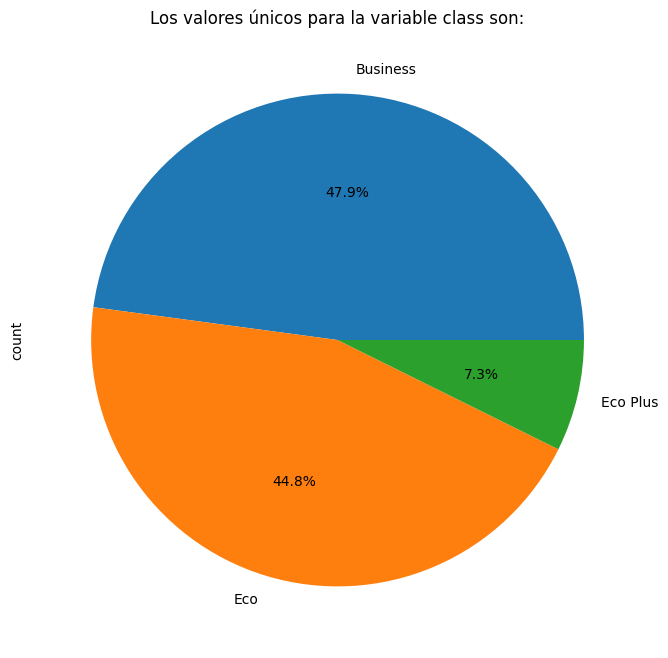

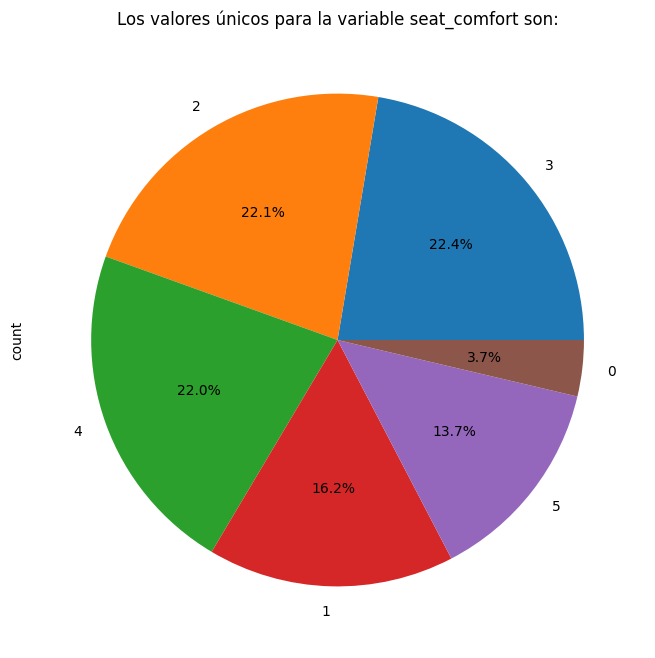

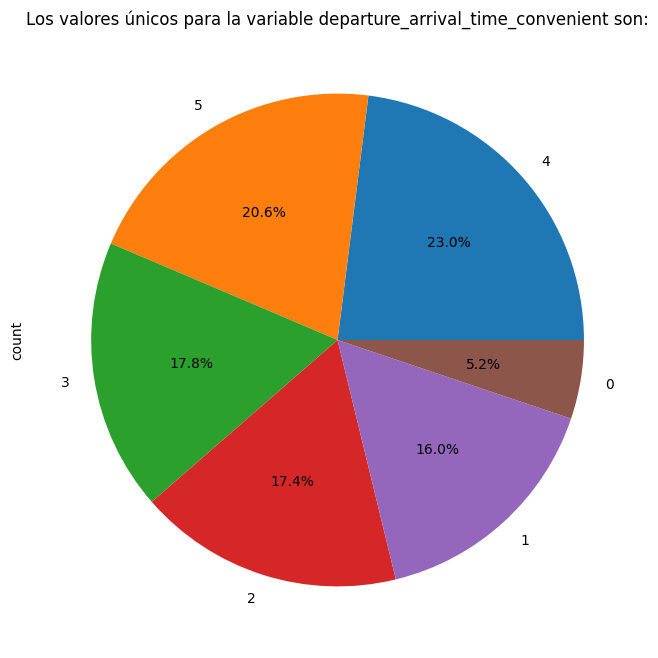

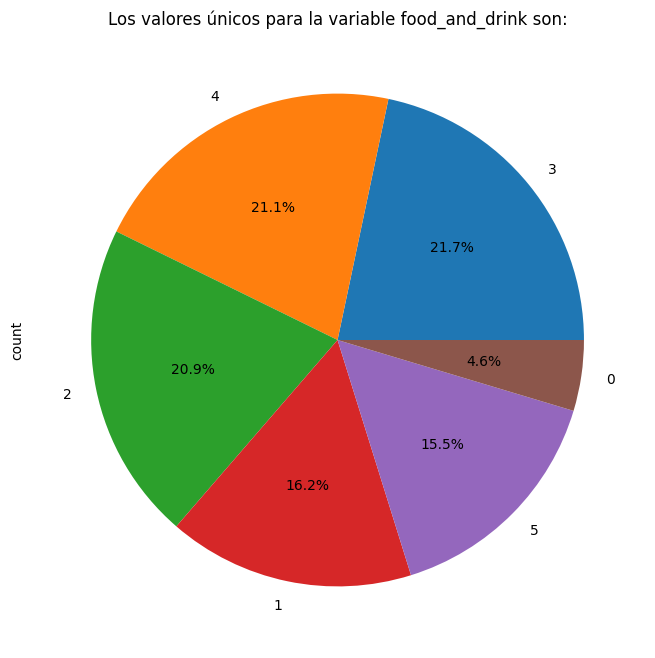

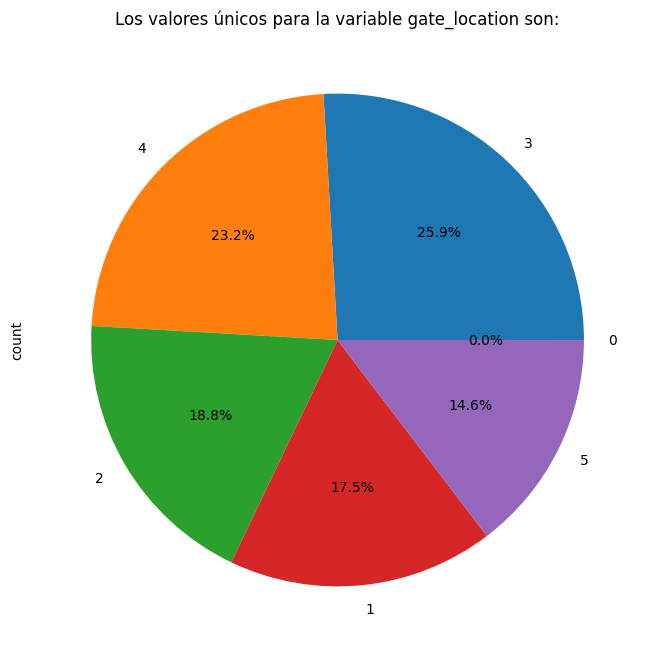

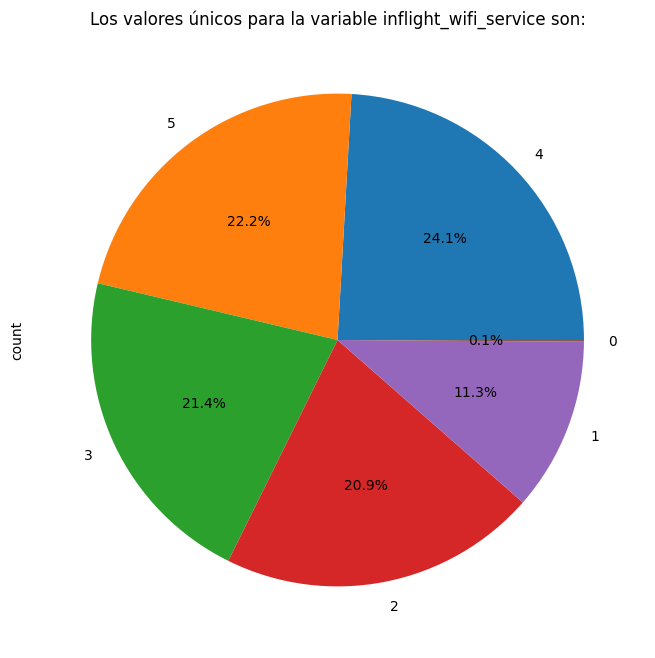

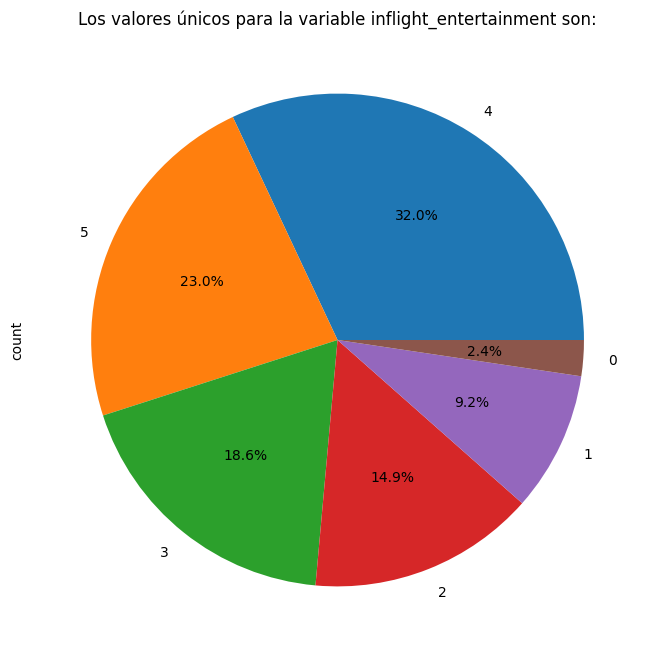

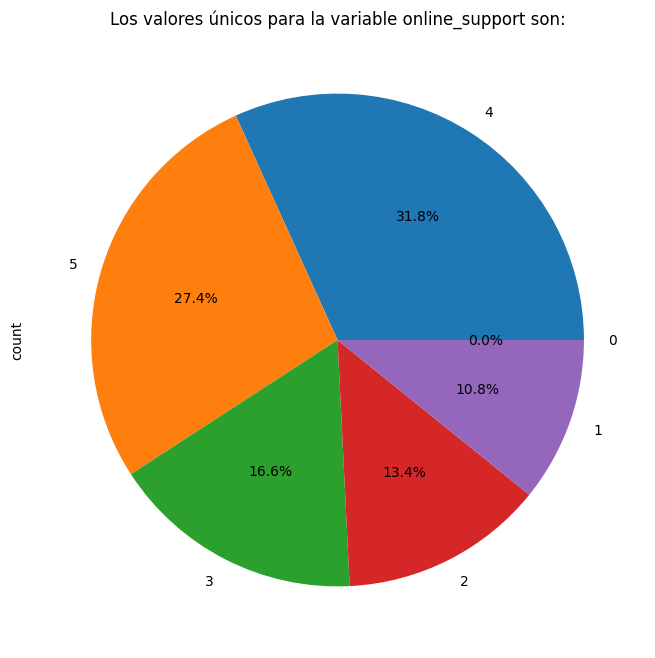

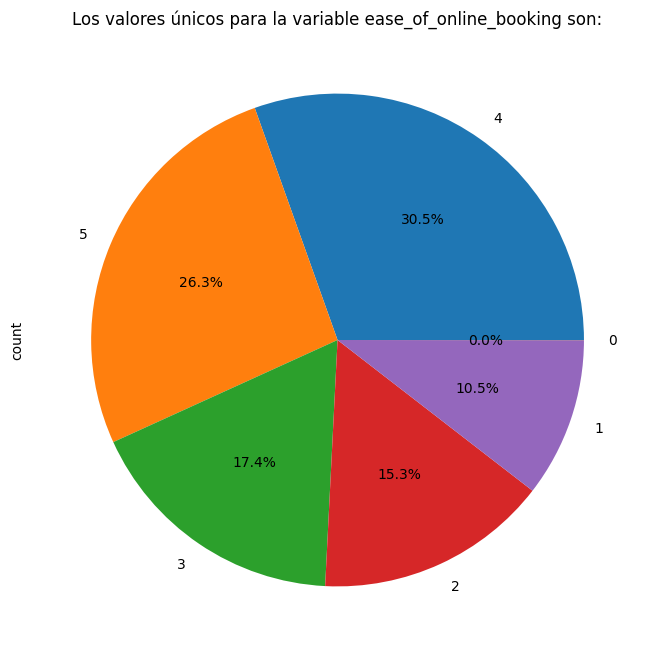

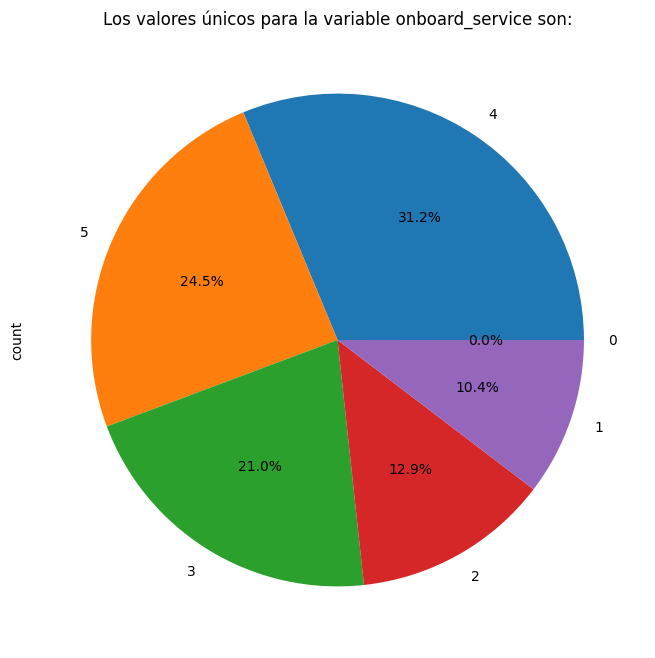

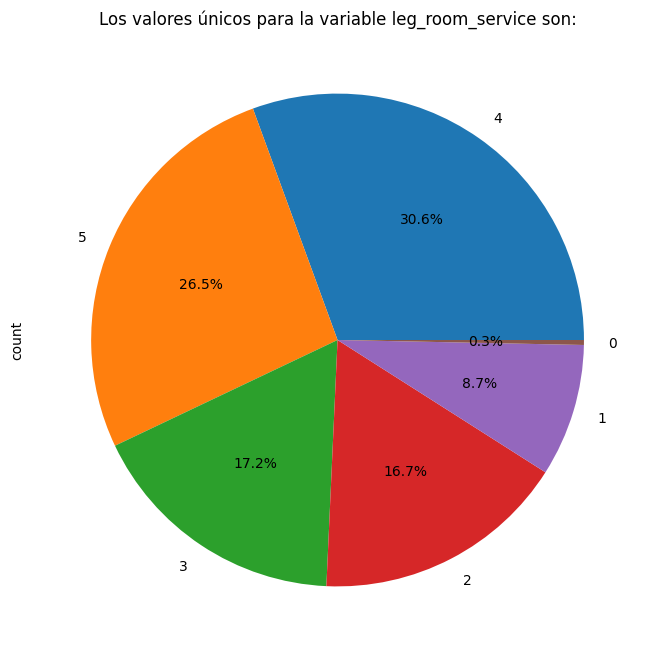

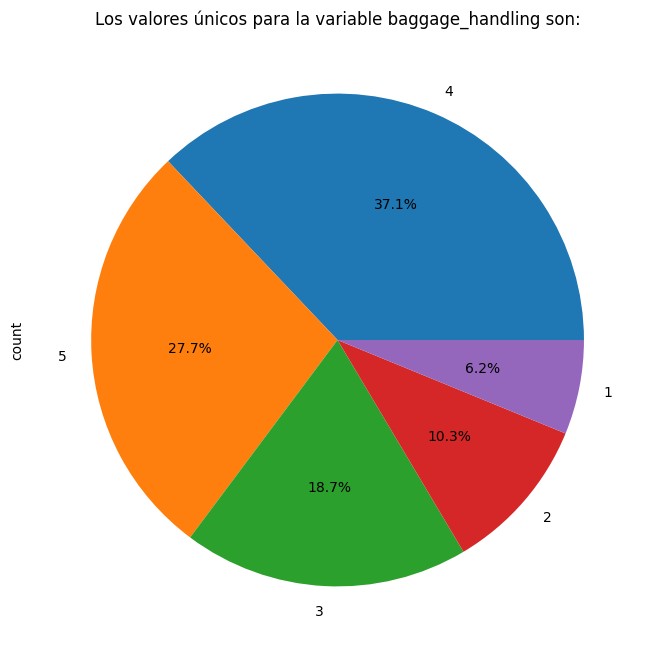

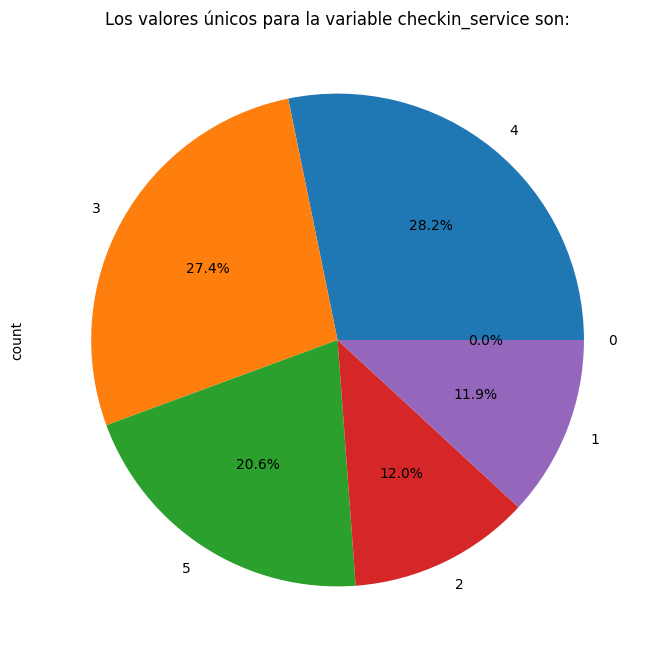

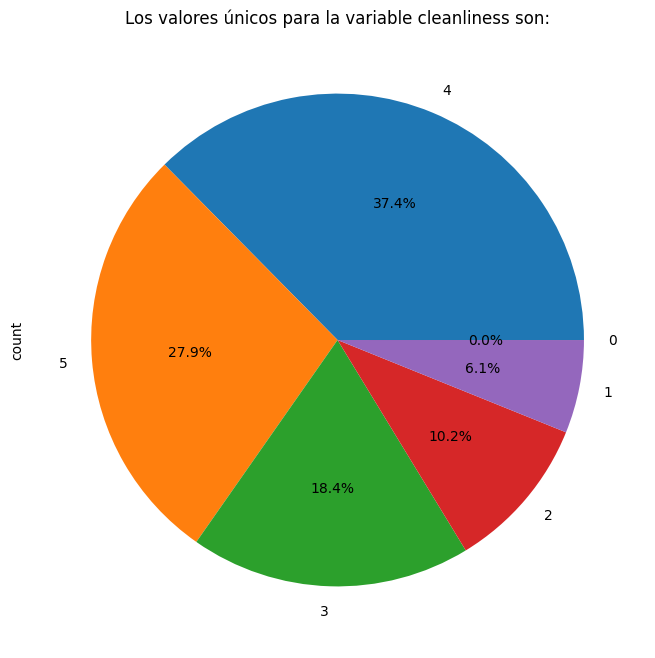

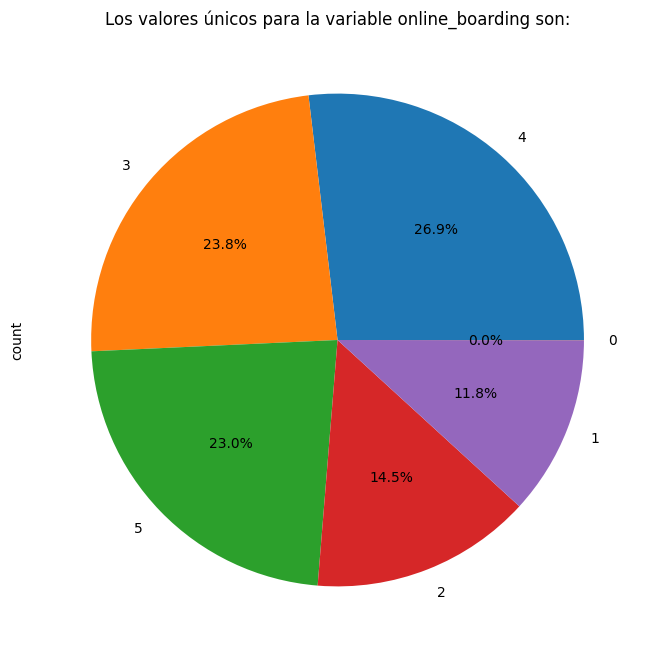

In [51]:
similar_variables(lista_variables)

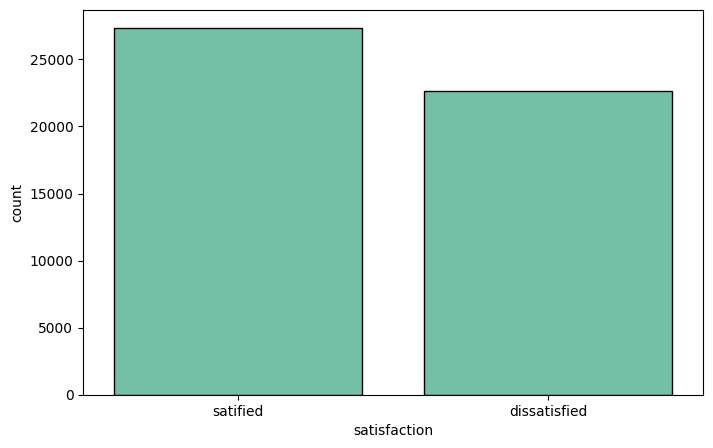

In [52]:
# Vamos a ver la distribución de la variable respuesta ("satisfaction")

plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["satified", "dissatisfied"]) 
plt.show();

In [53]:
#Vamos a ver cuántas columnas categóricas tenemos:
len(df.select_dtypes(include = ["O", "category"]).columns)

19

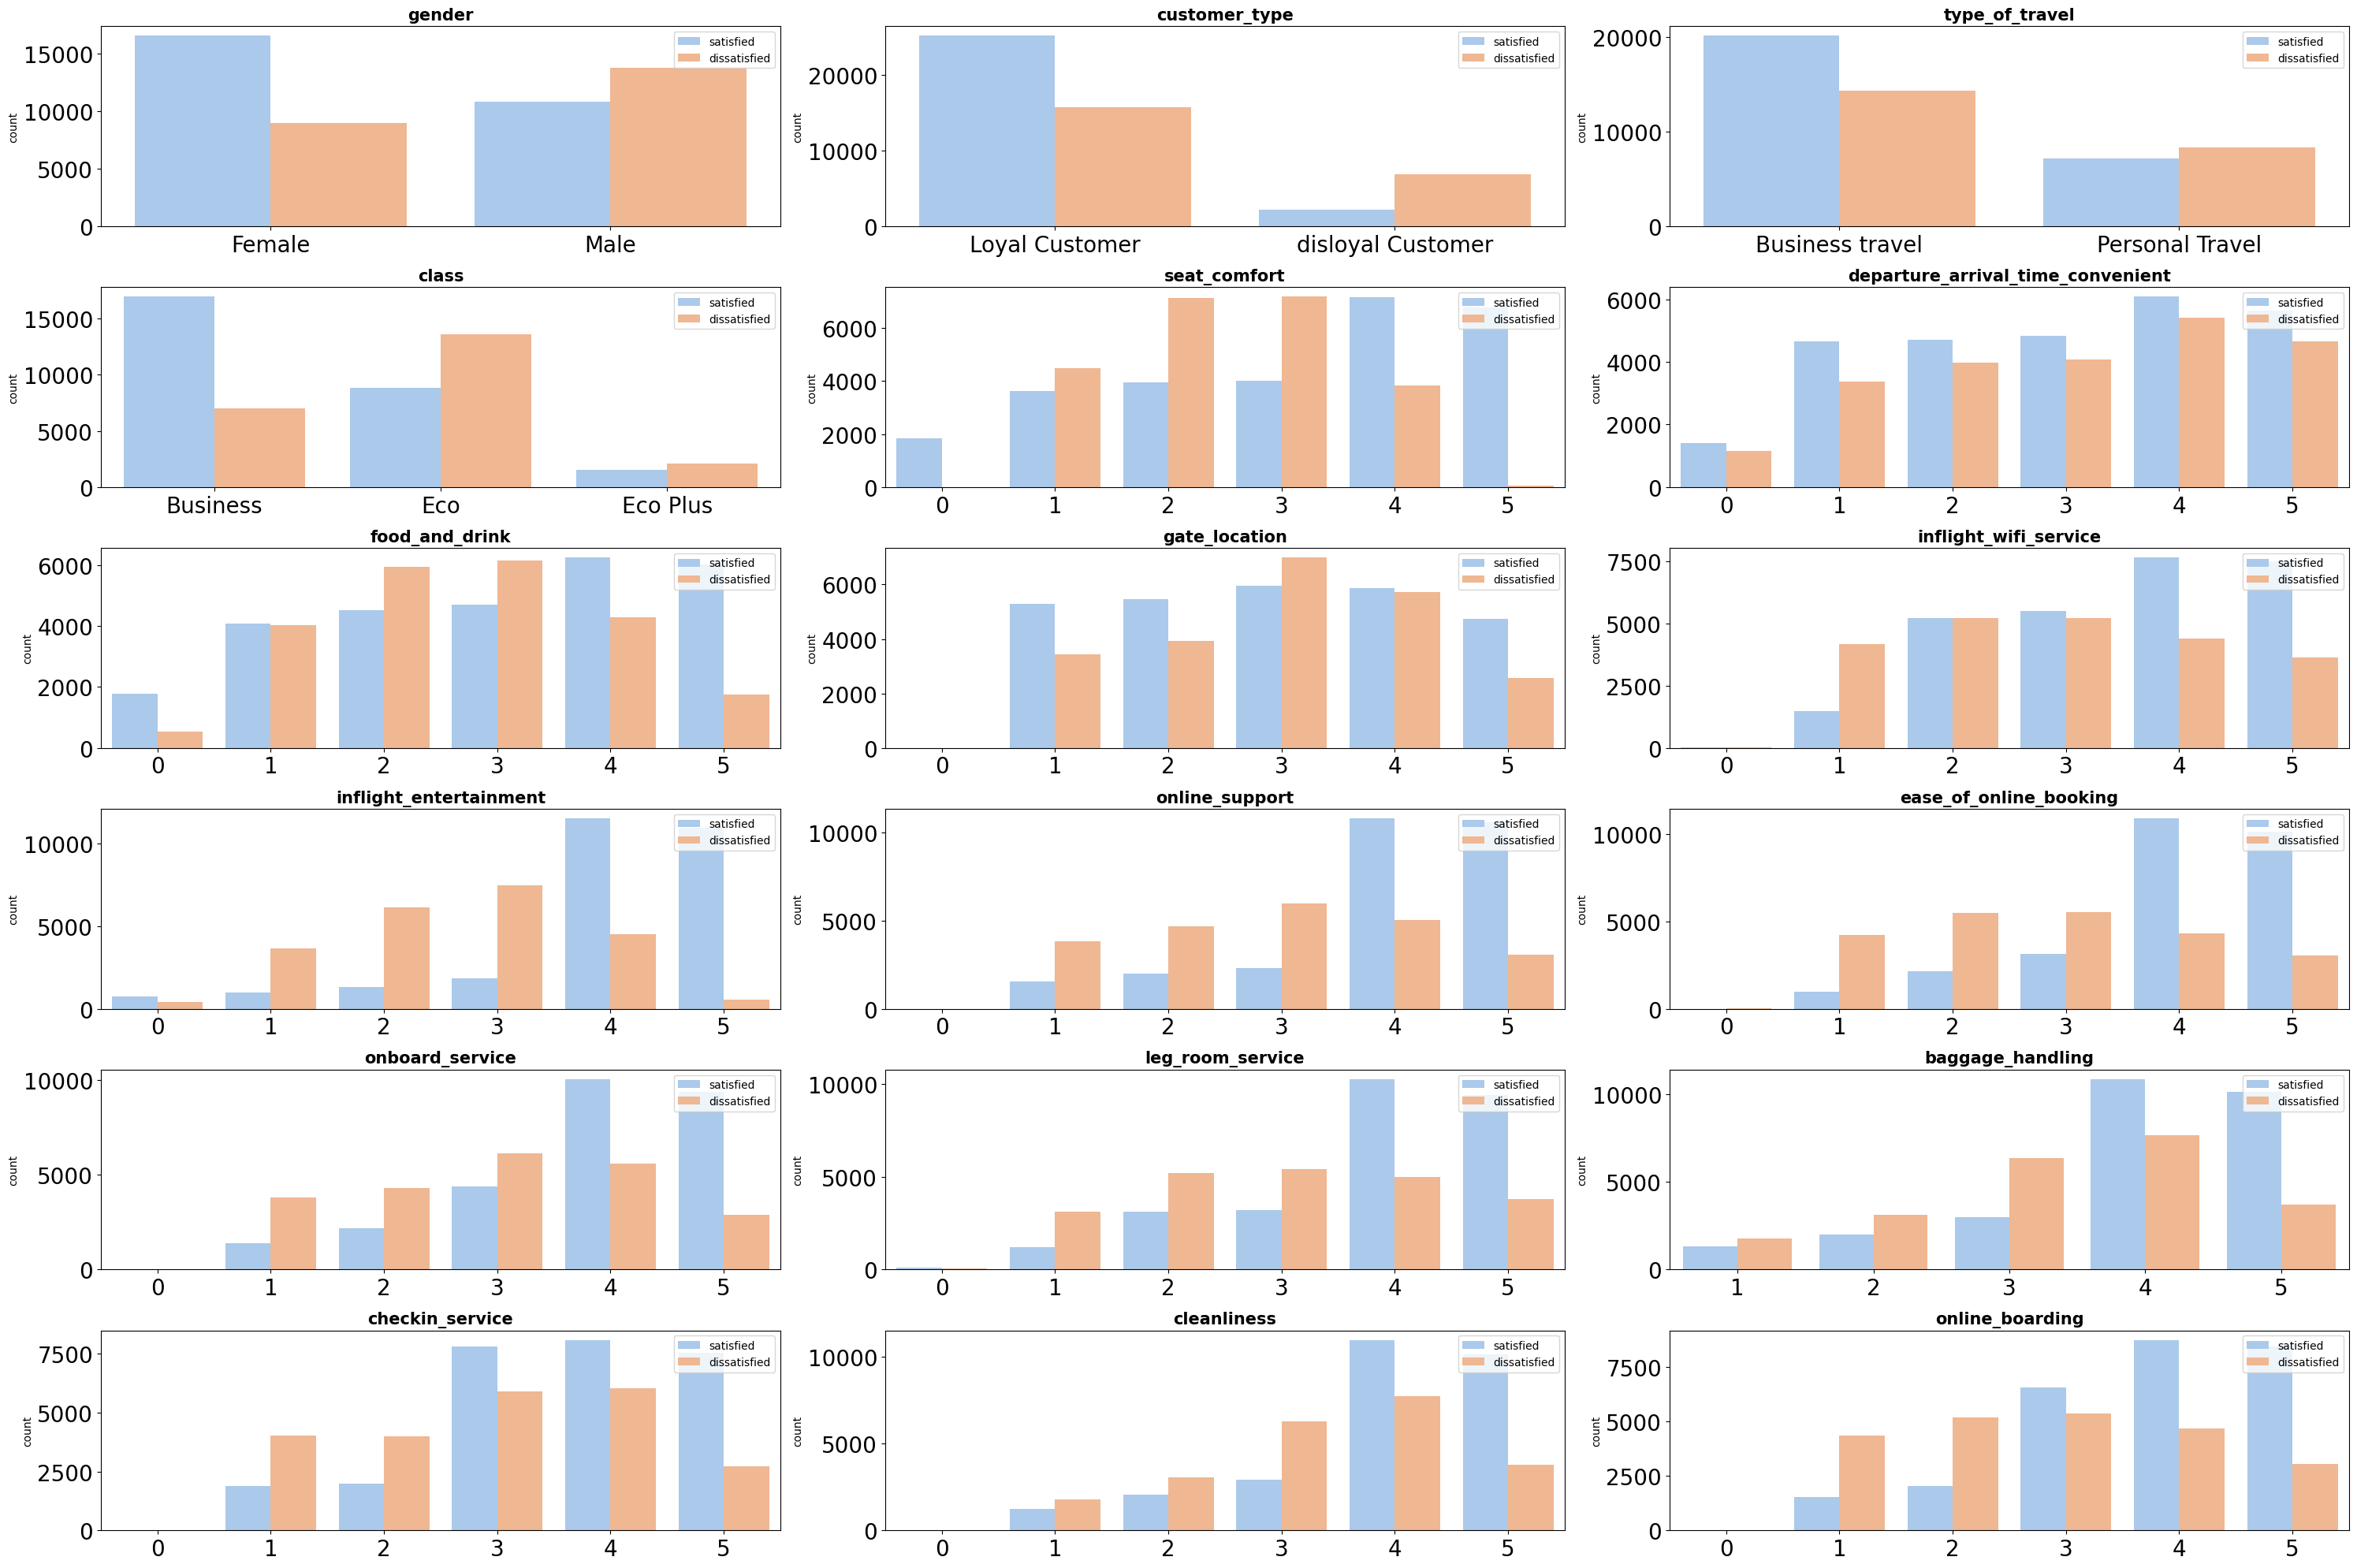

In [54]:
# Vamos a ver ahora la distribución de las categóricas en función de la VR:

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 20))

axes = axes.flat
columnas_cat = df.select_dtypes(include = ["O", "category"]).columns[1:]

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        palette= "pastel", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

En muchas de las variables, podemos ver cierta relación entre la satisfacción de algunos puntos y de la satisfacción general: "seat_confort", "inflight:_wifi_service", inflight_entertainment", online_support, "ease_of_online_booking""onboard_service", "cleanliness" y "online_boarding".

In [55]:
len(df.select_dtypes(include = np.number).columns)

4

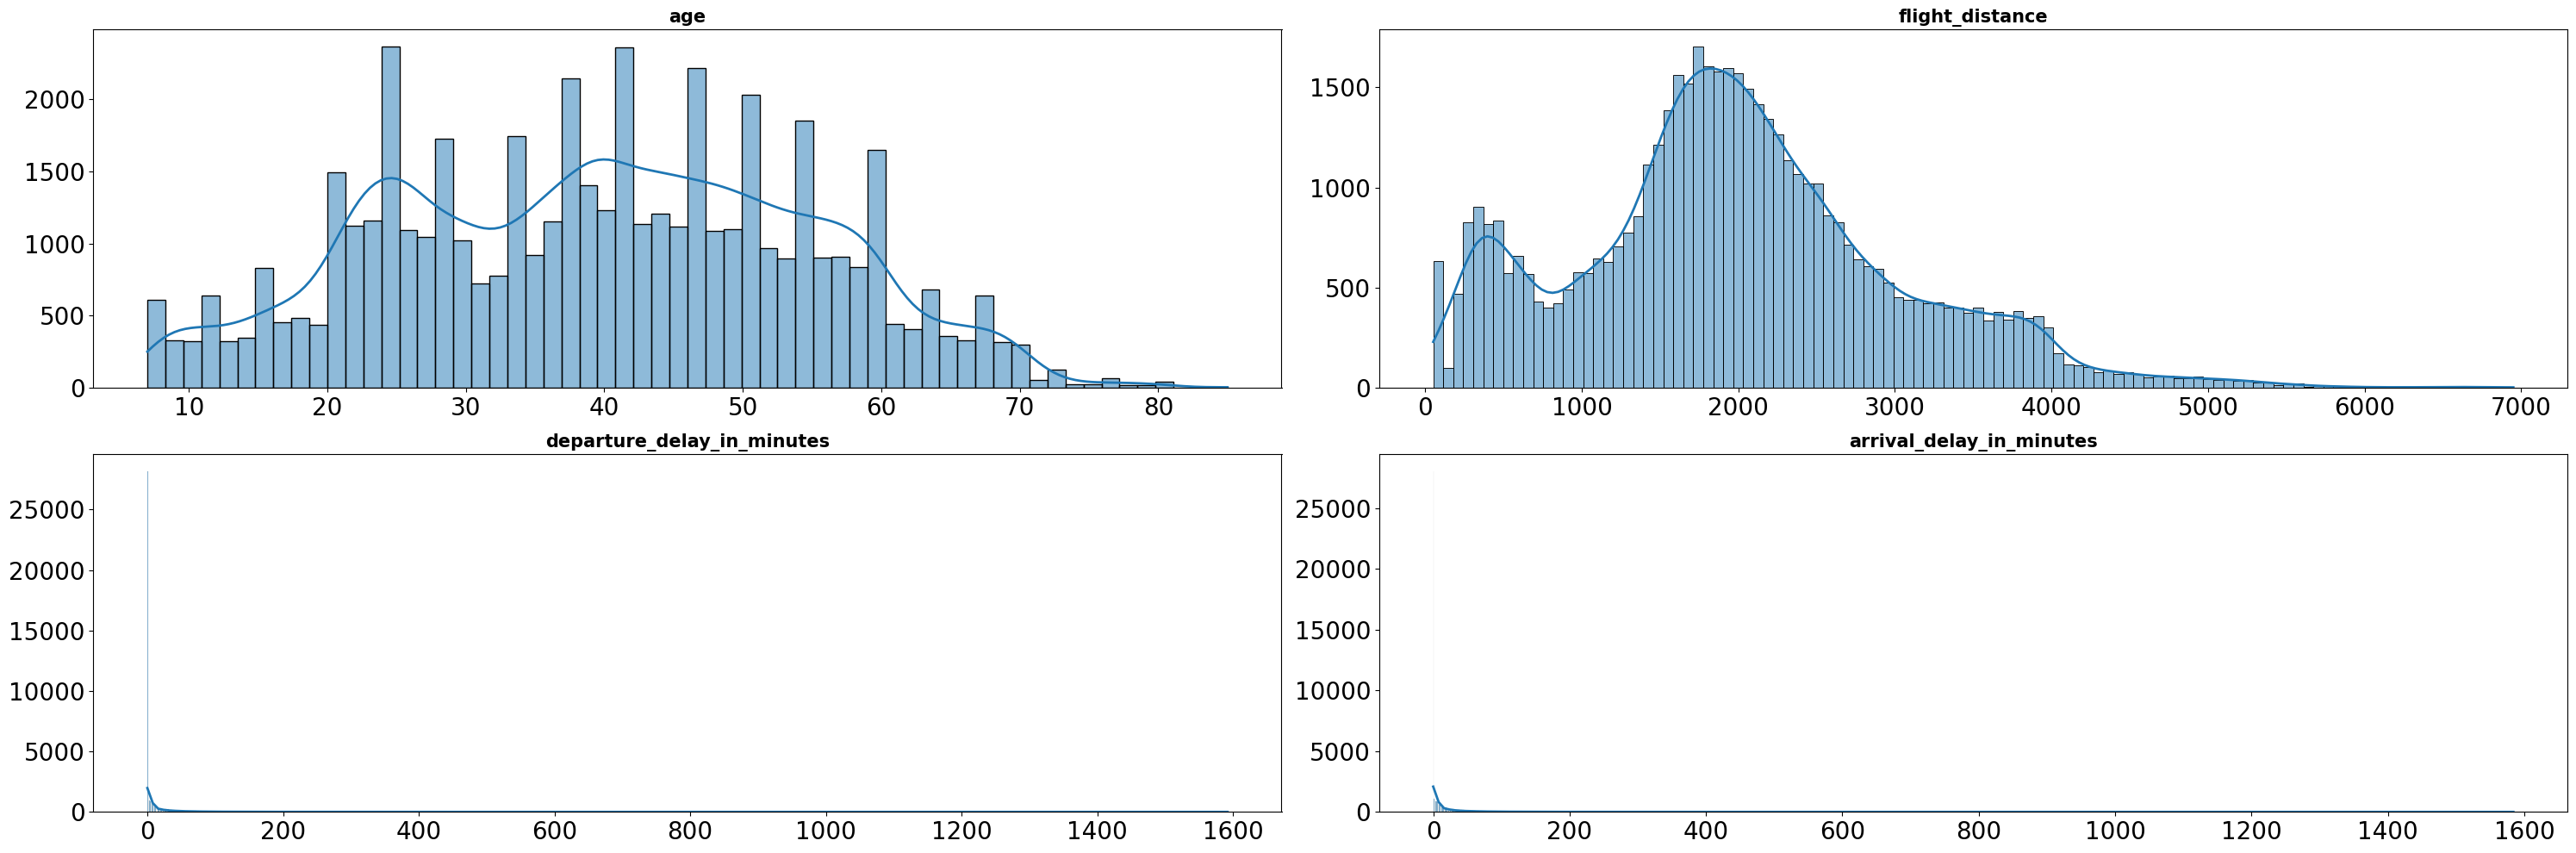

In [56]:
#Vamos a ver la distribución de las numéricas:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        palette= "pastel", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

A simple vista, los datos de ninguna de estas variables parece que tengan una distribución normales.

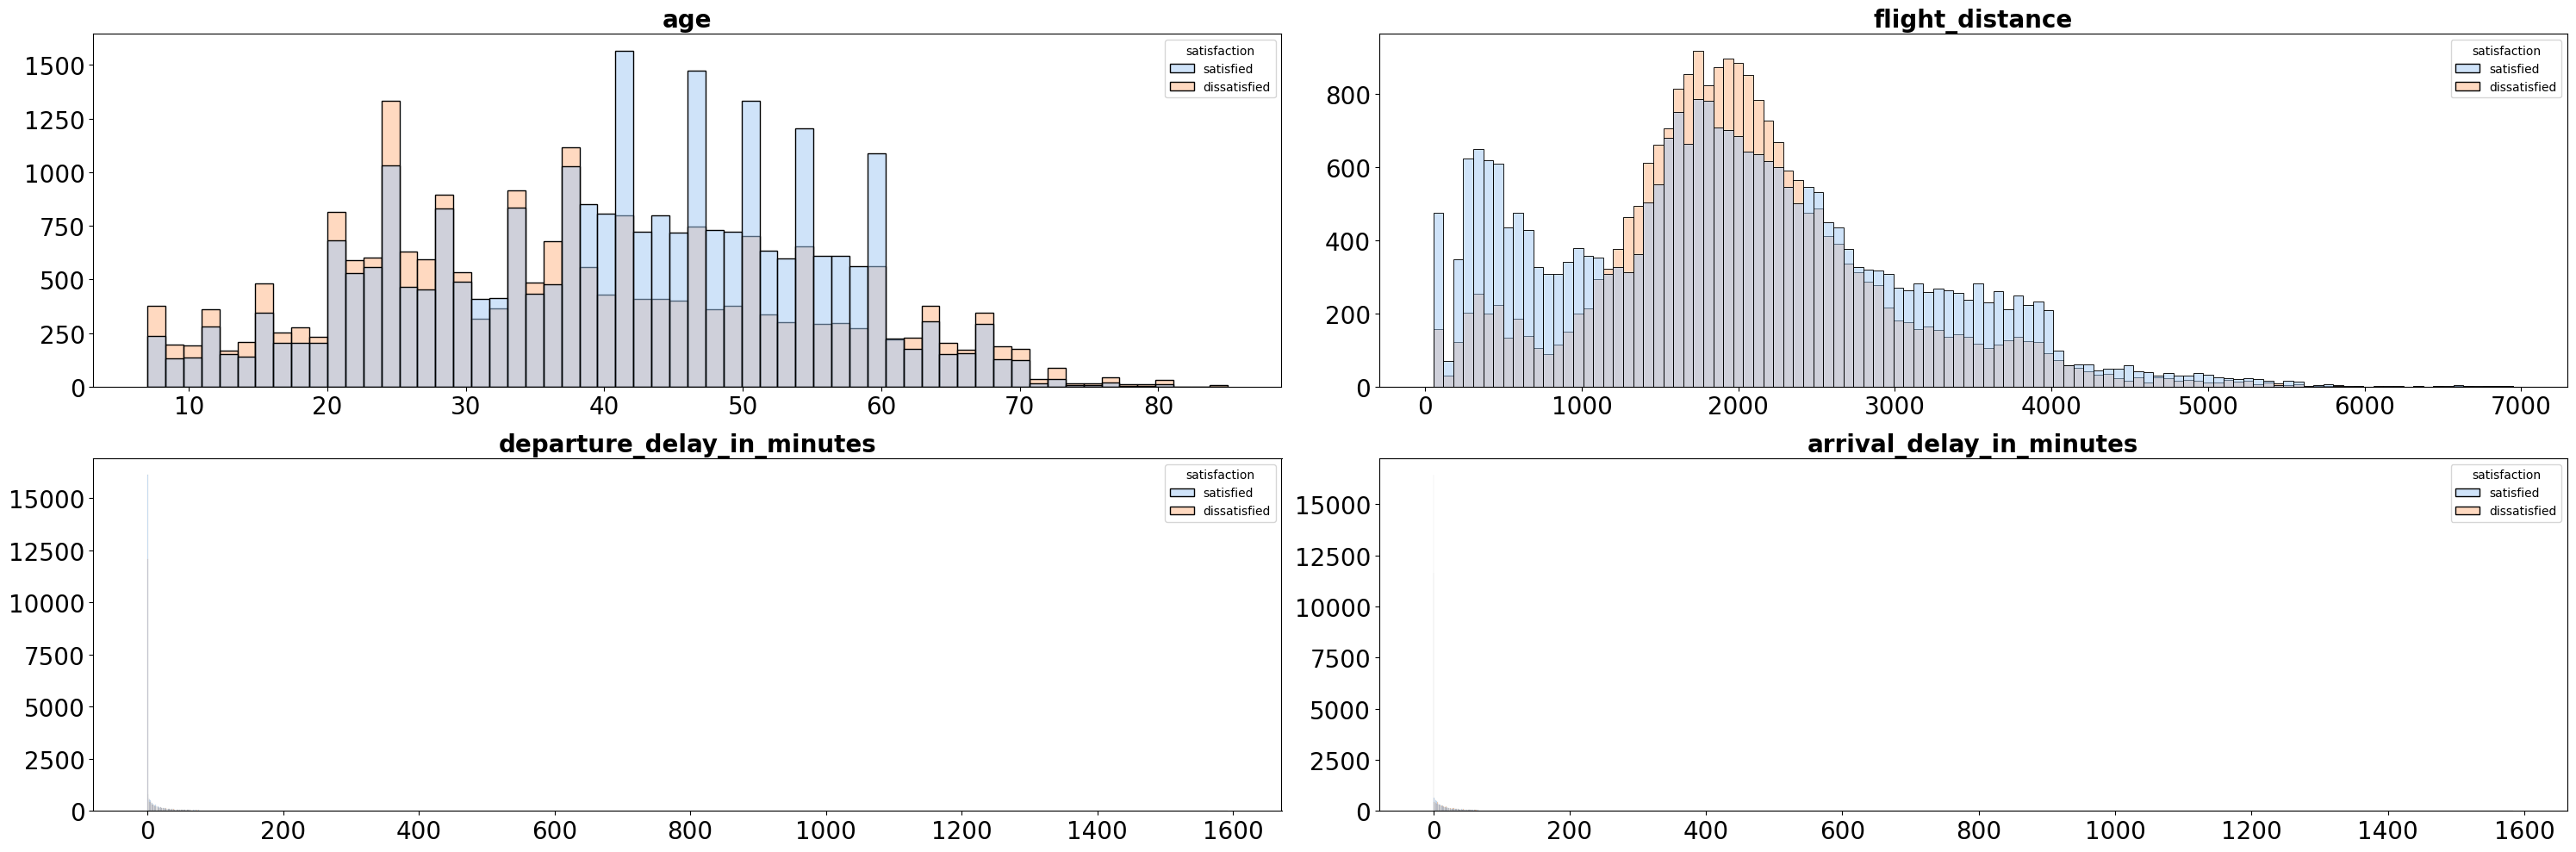

In [57]:
# Ahora vamos a vcer la distribución de las numéricas en relación con la VR:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

axes = axes.flat

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "satisfaction", 
        line_kws = {"linewidth": 2}, 
        palette= "pastel",
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

- Los pasajeros más satisfechos son los que se encuentran entre 39-40 años y 60 y, en cambio, son los más jóvenes los que puntúan más insatisfechos.

- Con respecto a la distancia, se encuentran más satisfechos los de vuelos más cortos.

- En el caso de las salidas/llegadas con retraso, la mayor parte de la muestra no ha sufrido ningún retraso.

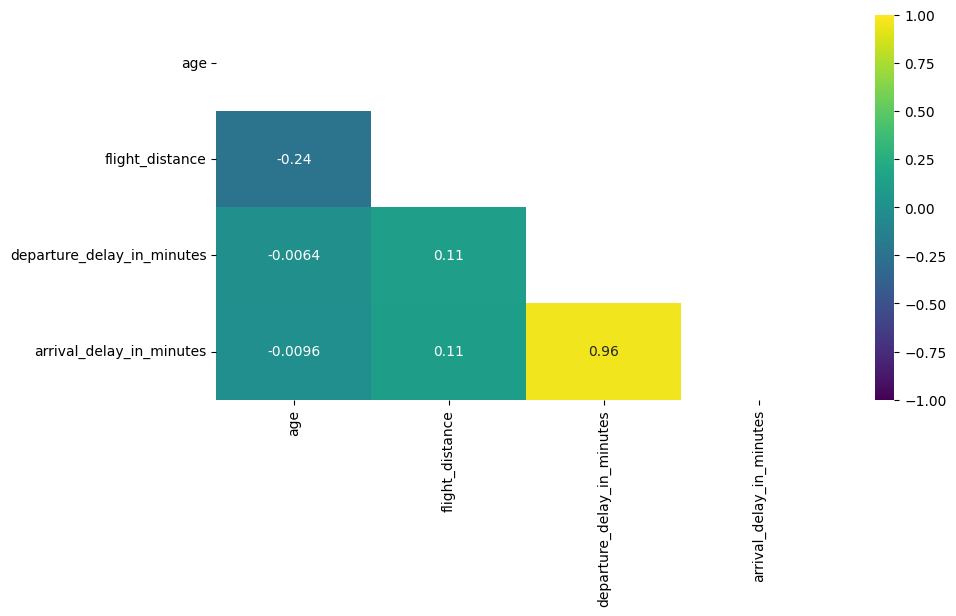

In [58]:
# Vamos a ver la correlación entre las numéricas
df_numericas = df.select_dtypes(include = np.number)

plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(df_numericas.corr(), dtype=bool))
sns.heatmap(df_numericas.corr(), cmap="viridis", annot = True, mask = mask, vmin= -1, vmax= 1);

Vemos que hay una correlación muy alta entre "departure_delay_in_minutes" y "arrival_delay_in_minutes". Vamos a excluir de la predicción esta segunda porque, además, es en la que hemos tenido que inputar nulos (en la primera no había).

In [61]:
df.drop("arrival_delay_in_minutes", axis= 1, inplace= True)

In [62]:
# Vamos a guardar el df sin esta columna para los análisis y predicción posteriores:

df.to_pickle("data/airline_limpio.pkl")

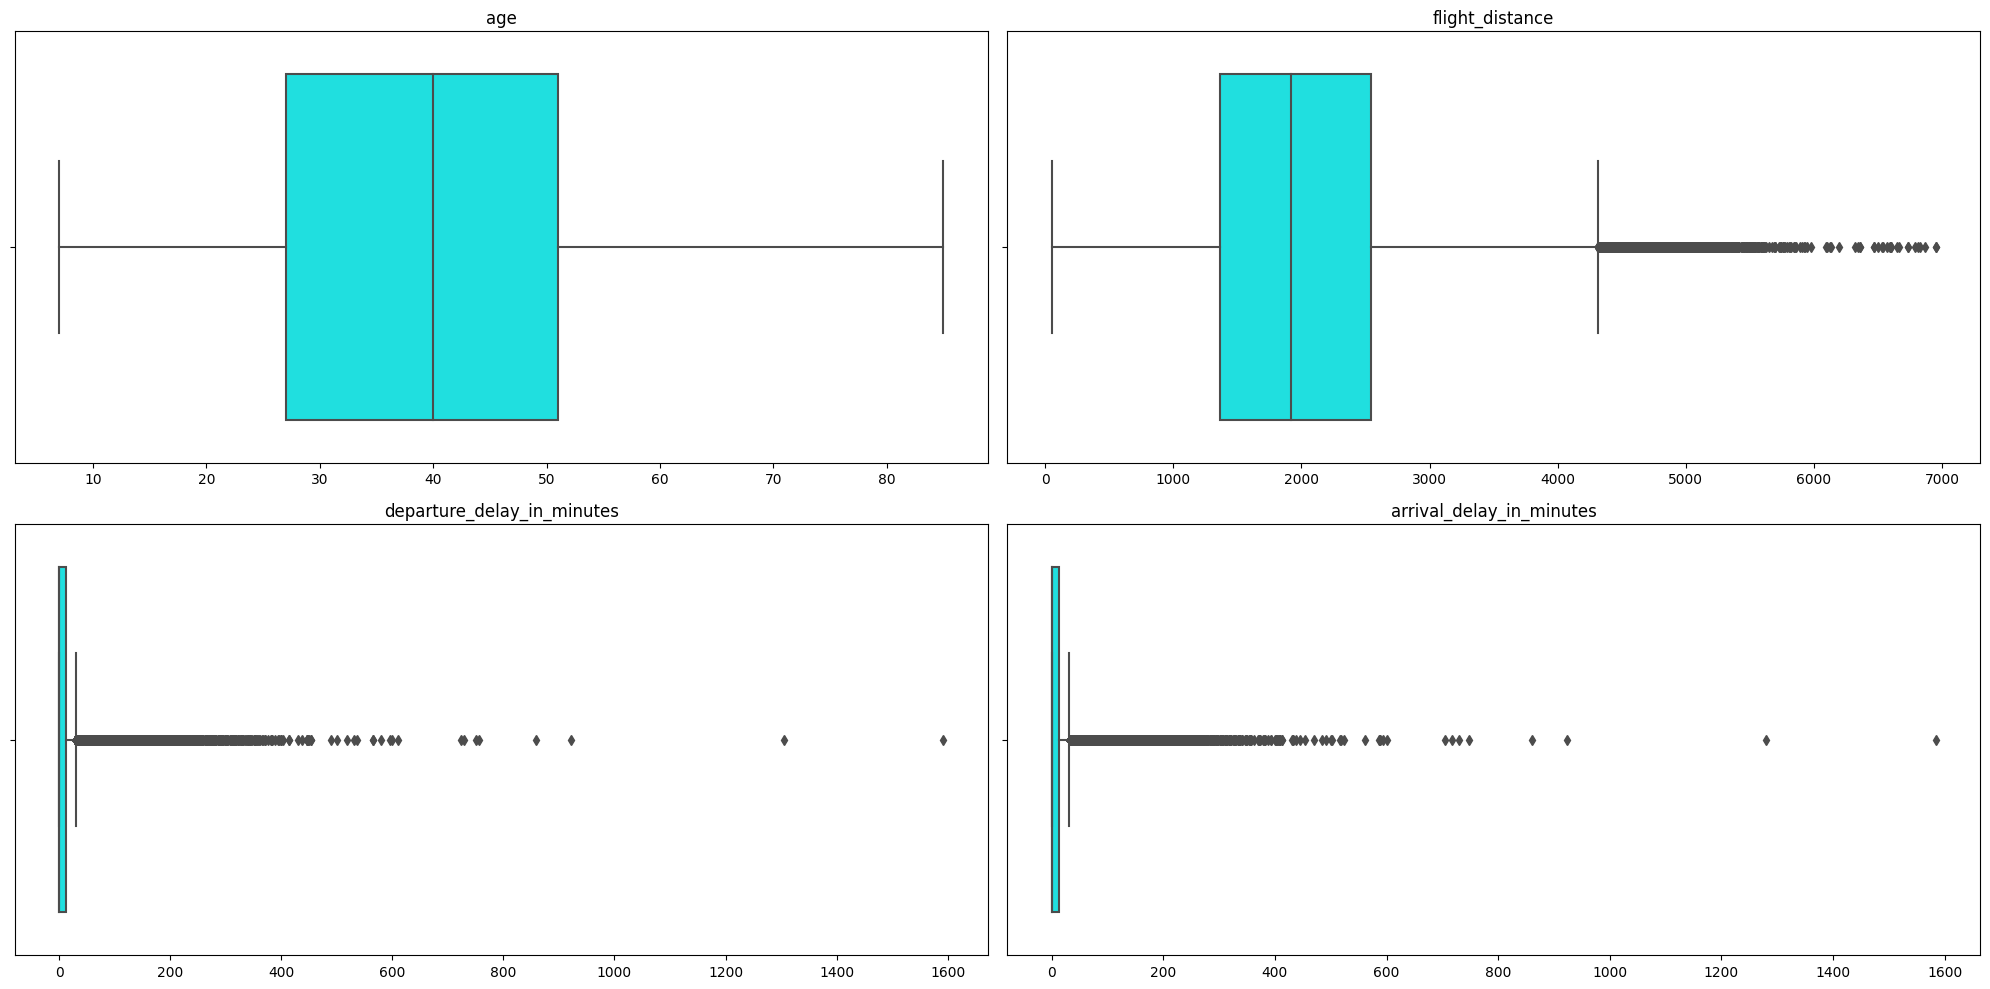

In [60]:
# Vamos a comprobar outliers:

fig, axes = plt.subplots(2, 2, figsize=(20,10))

axes = axes.flat

for indice, cate in enumerate(columnas_numeric):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], color = "cyan");

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

Aunque tenemos outliers en tres de las numéricas, son resultados factibles, por lo que no los vamos a reemplazar.